## 1. Introduction

Rossmann, brand that operates over 3,000 drug stores in 7 European countries, want to predict sales in the future based on historical data from January 2013 to July 2015.

### 1.1. Goal

- Explore the data and perform correlational analysis between sales and many related features of stores and time series.
- Build sales prediction model using Linear Regression

### 1.2. Data description

**Store data**
- *StoreType* - differentiates between 4 different store models: a, b, c, d
- *Assortment* - describes an assortment level: a = basic, b = extra, c = extended
- *CompetitionDistance* - distance in meters to the nearest competitor store
- *CompetitionOpenSince[Month/Year]* - gives the approximate year and month of the time the nearest competitor was opened
- *Promo* - indicates whether a store is running a promo on that day
- *Promo2* - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating
- *Promo2Since[Year/Week]* - describes the year and calendar week when the store started participating in Promo2
- *PromoInterval* - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

**Sales data**
- *Id* - an Id that represents a (Store, Date) duple within the test set
- *Store* - a unique Id for each store
- *Sales* (Target) - the turnover for any given day (this is what you are predicting)
- *Customers* - the number of customers on a given day
- *Open* - an indicator for whether the store was open: 0 = closed, 1 = open
- *StateHoliday* - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
- *SchoolHoliday* - indicates if the (Store, Date) was affected by the closure of public schools

## 2. Data processing

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import datetime

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

# for visualization
import seaborn as sns
import matplotlib.pyplot as plt

#set default parameters of charts
plt.style.use('seaborn')
plt.rcParams['figure.figsize'] = [20, 12]
plt.rc('font', size=15)          # controls default text sizes
plt.rc('axes', titlesize=18)     # fontsize of the axes title
plt.rc('axes', labelsize=15)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=12)    # fontsize of the tick labels
plt.rc('ytick', labelsize=12)    # fontsize of the tick labels
plt.rc('legend', fontsize=15)    # legend fontsize

pd.set_option('display.float_format', '{:.5f}'.format)

In [2]:
# import data

df_sales = pd.read_csv("Sales_data.csv")
df_store = pd.read_csv("Store_data.csv")
#testdata

In [3]:
print("Number of rows of Sales data: {}, number of columns of Sales data: {}".format(df_sales.shape[0],df_sales.shape[1]))
print("Number of rows of Store data: {}, number of columns of Store data: {}".format(df_store.shape[0],df_store.shape[1]))

Number of rows of Sales data: 91256, number of columns of Sales data: 9
Number of rows of Store data: 100, number of columns of Store data: 10


In [4]:
df_sales.head(5)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,7/31/2015,5263,555,1,1,0,1
1,2,5,7/31/2015,6064,625,1,1,0,1
2,3,5,7/31/2015,8314,821,1,1,0,1
3,4,5,7/31/2015,13995,1498,1,1,0,1
4,5,5,7/31/2015,4822,559,1,1,0,1


In [5]:
df_store.head(5)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270,9.00000,2008.00000,0,NaN,NaN,NaN
1,2,a,a,570,11.00000,2007.00000,1,13.00000,2010.00000,"Jan,Apr,Jul,Oct"
2,3,a,a,14130,12.00000,2006.00000,1,14.00000,2011.00000,"Jan,Apr,Jul,Oct"
3,4,c,c,620,9.00000,2009.00000,0,NaN,NaN,NaN
4,5,a,a,29910,4.00000,2015.00000,0,NaN,NaN,NaN


In [6]:
# Merge data
df = pd.merge(df_sales, df_store, how="left", on="Store")
df.sample()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
12802,3,3,3/25/2015,5538,679,1,0,0,0,a,a,14130,12.00000,2006.00000,1,14.00000,2011.00000,"Jan,Apr,Jul,Oct"


In [7]:
df.describe(include='all')

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
count,91256.00000,91256.00000,91256,91256.00000,91256.00000,91256.00000,91256.00000,91256,91256.00000,91256,91256,91256.00000,65800.00000,65800.00000,91256.00000,48292.00000,48292.00000,48292
unique,NaN,NaN,942,NaN,NaN,NaN,NaN,4,NaN,4,2,NaN,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,7/31/2015,NaN,NaN,NaN,NaN,0,NaN,a,a,NaN,NaN,NaN,NaN,NaN,NaN,"Jan,Apr,Jul,Oct"
freq,NaN,NaN,100,NaN,NaN,NaN,NaN,88444,NaN,51280,49212,NaN,NaN,NaN,NaN,NaN,NaN,34714
mean,50.33870,3.99833,NaN,5545.36234,579.65725,0.82841,0.38152,NaN,0.17659,NaN,NaN,5600.10980,7.44347,2008.79578,0.52919,23.43871,2011.40673,NaN
std,28.90536,1.99740,NaN,3466.08156,362.83595,0.37703,0.48576,NaN,0.38132,NaN,NaN,7045.81541,3.31954,4.02438,0.49915,14.82611,1.67697,NaN
min,1.00000,1.00000,NaN,0.00000,0.00000,0.00000,0.00000,NaN,0.00000,NaN,NaN,40.00000,1.00000,1999.00000,0.00000,1.00000,2009.00000,NaN
25%,25.00000,2.00000,NaN,3755.00000,406.00000,1.00000,0.00000,NaN,0.00000,NaN,NaN,620.00000,4.00000,2006.00000,0.00000,13.00000,2010.00000,NaN
50%,50.00000,4.00000,NaN,5686.00000,587.00000,1.00000,0.00000,NaN,0.00000,NaN,NaN,2370.00000,8.00000,2009.00000,1.00000,22.00000,2011.00000,NaN
75%,75.00000,6.00000,NaN,7623.00000,786.00000,1.00000,1.00000,NaN,0.00000,NaN,NaN,7660.00000,10.00000,2013.00000,1.00000,37.00000,2013.00000,NaN


#### Duplicate values

In [8]:
# check duplicate
df[df.duplicated()].shape[0]

0

The dataset doesn't have duplicate values.

#### Missing values

In [9]:
pd.concat([pd.DataFrame(df.dtypes, columns=["Type"]),
           pd.DataFrame(df.isna().sum(), columns=["NA"]),
           pd.DataFrame(df.isna().mean(), columns=["%NA"])], axis=1)

,Type,NA,%NA
Store,int64,0,0.00000
DayOfWeek,int64,0,0.00000
Date,object,0,0.00000
Sales,int64,0,0.00000
Customers,int64,0,0.00000
Open,int64,0,0.00000
Promo,int64,0,0.00000
StateHoliday,object,0,0.00000
SchoolHoliday,int64,0,0.00000
StoreType,object,0,0.00000


Since NA values all come from Store data (*CompetitionOpenSinceMonth, CompetitionOpenSinceYear, Promo2SinceWeek, Promo2SinceYear, PromoInterval*), the fillout NA process will be done with Store data seperately and merged again after that.

In [11]:
# CompetitionDistance
# df_store[pd.isnull(df_store.CompetitionDistance)] 

In [13]:
# plt.figure(figsize=(20, 5))

# plt.subplot(1, 2, 1)
# sns.boxplot(x="CompetitionDistance", data=df_store, showmeans= True) # tru phan null cua Distance
# plt.title("Competition Distance Boxplot", fontweight="bold")
# plt.xlabel("Distance")

# plt.subplot(1, 2, 2)
# plt.hist(df_store.CompetitionDistance, cumulative=False)
# plt.title("Competition Distance Histogram", fontweight="bold")
# plt.xlabel("Distance")
# plt.ylabel("Count")
# plt.show()
# print("It can be seen that there is a significant difference between mean and median, so it's better to replace NA with mean to avoid bias with outliners.")
# df_store['CompetitionDistance'].fillna(df_store['CompetitionDistance'].median(), inplace = True)

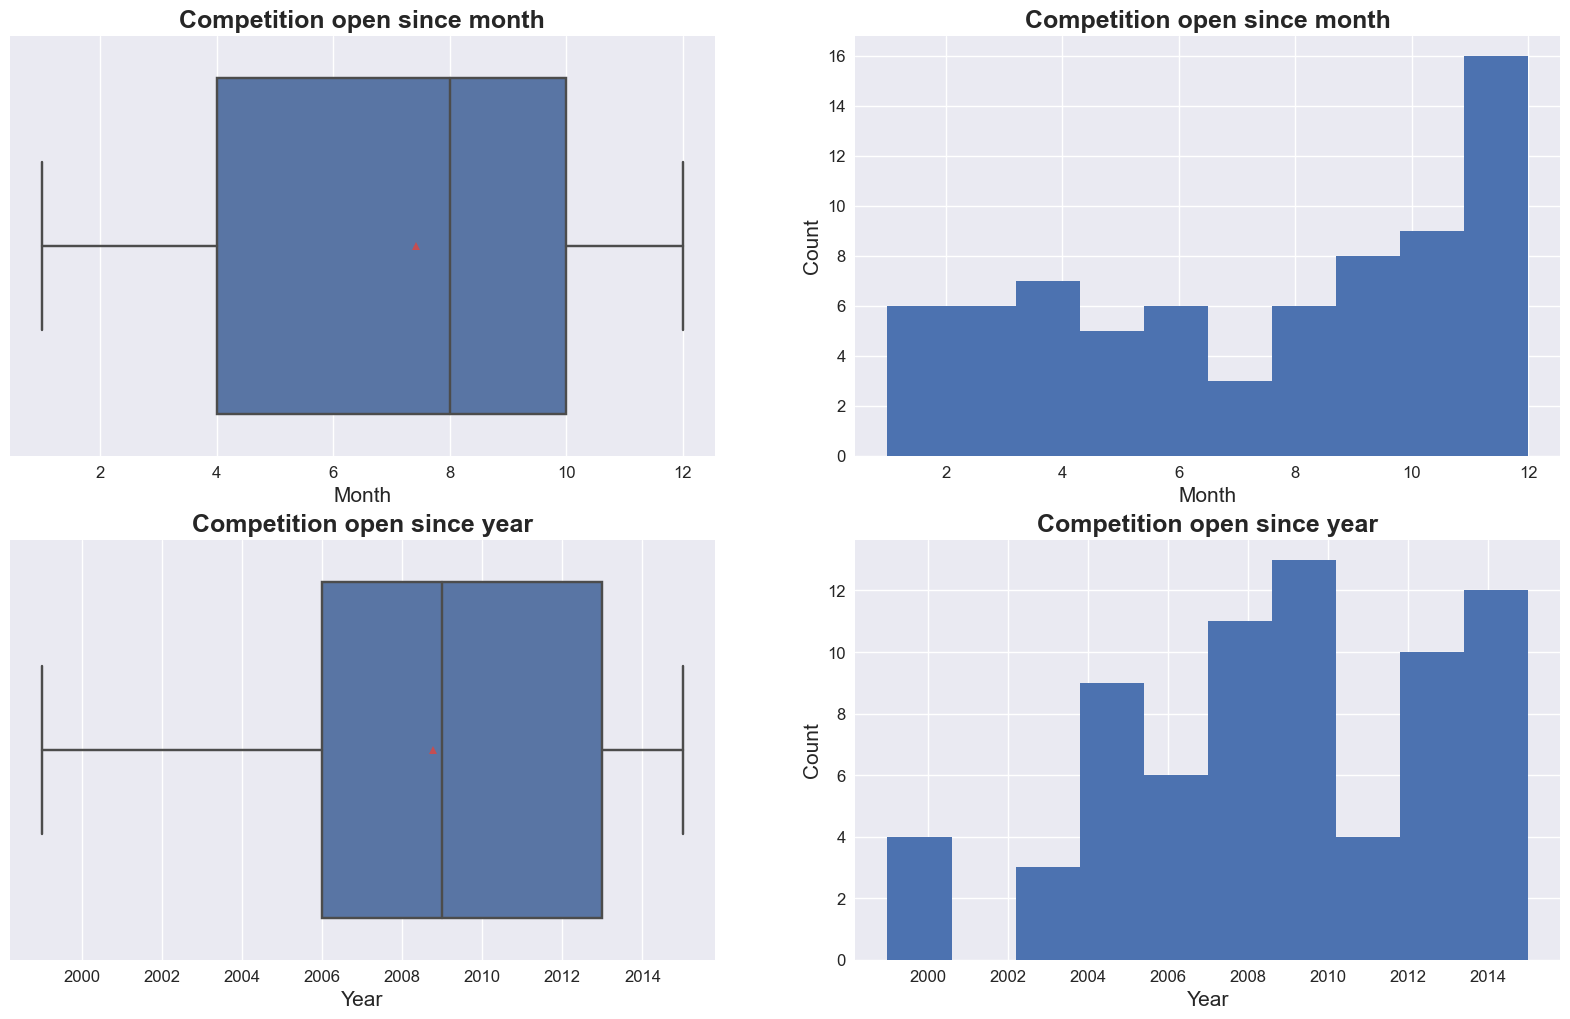

In [14]:
# CompetitionOpenSinceMonth & CompetitionOpenSinceYear NA

plt.subplot(2, 2, 1)
sns.boxplot(x="CompetitionOpenSinceMonth", data=df_store, showmeans= True) # tru phan null cua Distance
plt.title("Competition open since month", fontweight="bold")
plt.xlabel("Month")
plt.ylabel("")

plt.subplot(2, 2, 2)
plt.hist(df_store.CompetitionOpenSinceMonth, cumulative=False)
plt.title("Competition open since month", fontweight="bold")
plt.xlabel("Month")
plt.ylabel("Count")

plt.subplot(2, 2, 3)
sns.boxplot(x="CompetitionOpenSinceYear", data=df_store, showmeans= True) # tru phan null cua Distance
plt.title("Competition open since year", fontweight="bold")
plt.xlabel("Year")
plt.ylabel("")

plt.subplot(2, 2, 4)
plt.hist(df_store.CompetitionOpenSinceYear, cumulative=False)
plt.title("Competition open since year", fontweight="bold")
plt.xlabel("Year")
plt.ylabel("Count")
plt.show()

There is no big difference between mean and median, so NA values will be replaced by mean.

In [15]:
# replace NA with mean
df_store['CompetitionOpenSinceMonth'].fillna(df_store['CompetitionOpenSinceMonth'].mean(), inplace = True)
df_store['CompetitionOpenSinceYear'].fillna(df_store['CompetitionOpenSinceYear'].mean(), inplace = True)

In [16]:
# Promo2SinceWeek, Promo2SinceYear & PromoInterval NA
df_store[pd.isnull(df_store.Promo2SinceWeek)].sample(10)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
48,49,d,c,18010,9.00000,2007.00000,0,NaN,NaN,NaN
87,88,a,a,10690,10.00000,2005.00000,0,NaN,NaN,NaN
33,34,c,a,2240,9.00000,2009.00000,0,NaN,NaN,NaN
54,55,a,a,720,11.00000,2004.00000,0,NaN,NaN,NaN
36,37,c,a,4230,12.00000,2014.00000,0,NaN,NaN,NaN
43,44,a,a,540,6.00000,2011.00000,0,NaN,NaN,NaN
49,50,d,a,6260,11.00000,2009.00000,0,NaN,NaN,NaN
22,23,d,a,4060,8.00000,2005.00000,0,NaN,NaN,NaN
59,60,d,c,5540,10.00000,2009.00000,0,NaN,NaN,NaN
9,10,a,a,3160,9.00000,2009.00000,0,NaN,NaN,NaN


In [17]:
df_store['Promo2'][pd.isnull(df_store.Promo2SinceWeek)].sum()

0

All the missing values comes from fields where Promo2 = 0 which also means that there are no continuous promotional activities for those stores. That leads to all the next columns will truely be all '0' values.

In [18]:
# replace NA with 0
df_store.Promo2SinceWeek.fillna(0,inplace=True)
df_store.Promo2SinceYear.fillna(0,inplace=True)
df_store.PromoInterval.fillna(0,inplace=True)

In [19]:
# Change Data Types
df_sales["Date"] = pd.to_datetime(df_sales["Date"])

df_store["CompetitionOpenSinceMonth"] = df_store["CompetitionOpenSinceMonth"].astype(int)
df_store["CompetitionOpenSinceYear"] = df_store["CompetitionOpenSinceYear"].astype(int)

df_store["Promo2SinceWeek"] = df_store["Promo2SinceWeek"].astype(int)
df_store["Promo2SinceYear"] = df_store["Promo2SinceYear"].astype(int)

In [20]:
# merge data again
df = pd.merge(df_sales, df_store, how="left", on="Store")
df.sample()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
14452,53,1,2015-03-09,5886,554,1,0,0,0,a,c,30360,9,2013,0,0,0,0


In [21]:
pd.concat([pd.DataFrame(df.dtypes, columns=["Type"]),
           pd.DataFrame(df.isna().sum(), columns=["NA"])], axis=1)

,Type,NA
Store,int64,0
DayOfWeek,int64,0
Date,datetime64[ns],0
Sales,int64,0
Customers,int64,0
Open,int64,0
Promo,int64,0
StateHoliday,object,0
SchoolHoliday,int64,0
StoreType,object,0


#### Feature Engineering

In [22]:
df["Year"] = df["Date"].dt.year # year
df["Month"] = df["Date"].dt.month # month
df["Day"] = df["Date"].dt.day # day
df["WeekOfYear"] = df["Date"].dt.isocalendar().week # week of year

In [23]:
# caculate the length of time since promo2 has first started in each store each day

df["Promo2Since"] = df["Promo2SinceYear"].astype(str) + "-" + df["Promo2SinceWeek"].astype(str)
df["Promo2Since"] = df[(df.Promo2 == 1)]["Promo2Since"].apply(lambda x: datetime.datetime.strptime(x + "-1", "%Y-%W-%w") - datetime.timedelta(days=7))
df['Promo2SinceTime'] = ((df[(df.Promo2 == 1)]["Date"] - df[(df.Promo2 == 1)]["Promo2Since"]) / 7).apply(lambda x: x.days).astype(int)
df['Promo2SinceTime'].loc[df['Promo2SinceTime'] < 0] = 0
df.Promo2SinceTime.fillna(0,inplace=True)

In [24]:
# caculate the length of time since nearest competitor has first opend in each store each day
df["CompetitionSince"] = df.apply(lambda x: datetime.datetime(year=x["CompetitionOpenSinceYear"],
                                                              month=x["CompetitionOpenSinceMonth"], 
                                                              day=1), axis=1)
df["CompetitionOpenSinceTime"] = ((df["Date"] - df["CompetitionSince"]) / 30).apply(lambda x: x.days).astype(int)

# df['CompetitionOpenSinceLengthOfMonth'] = pd.Series() 
# for i, v in df['CompetitionOpenSinceYear'].items():
#     if v == df.Year[i]: 
#         if df['CompetitionOpenSinceMonth'][i] <= df['Month'][i]:
#             df['CompetitionOpenSinceLengthOfMonth'].loc[i] = df['Month'][i] - df['CompetitionOpenSinceMonth'][i]
#         else: df['CompetitionOpenSinceLengthOfMonth'].loc[i] = 0
#     if v < df.Year[i]:
#         if df['CompetitionOpenSinceMonth'][i] <= df['Month'][i]:
#             df['CompetitionOpenSinceLengthOfMonth'].loc[i] = df['Month'][i] - df['CompetitionOpenSinceMonth'][i] + 12*(df.Year[i] - v)
#         else: 
#             df['CompetitionOpenSinceLengthOfMonth'].loc[i] = df['Month'][i] - df['CompetitionOpenSinceMonth'][i] + 12*(df.Year[i] - v - 1)

New variables for analysis:

In [25]:
df.iloc[:,18:28].sample(5)

,Year,Month,Day,WeekOfYear,Promo2Since,Promo2SinceTime,CompetitionSince,CompetitionOpenSinceTime
78243,2013,5,11,19,NaT,0.00000,2005-10-01,92
19624,2015,1,16,3,NaT,0.00000,2003-04-01,143
40305,2014,5,25,21,NaT,0.00000,2009-11-01,55
87638,2013,2,6,6,NaT,0.00000,2008-07-01,56
17744,2015,2,4,6,NaT,0.00000,2014-02-01,12


In [26]:
# drop redundant column and create new dataset for EDA
dfa = df.drop(['Promo2Since', 'CompetitionSince', 'WeekOfYear'], axis=1)

## **3. Exploratory Data Analysis**

In [27]:
df_num = dfa.select_dtypes(exclude=["object", "datetime64[ns]"])
df_cat = dfa.select_dtypes(include=["object"])

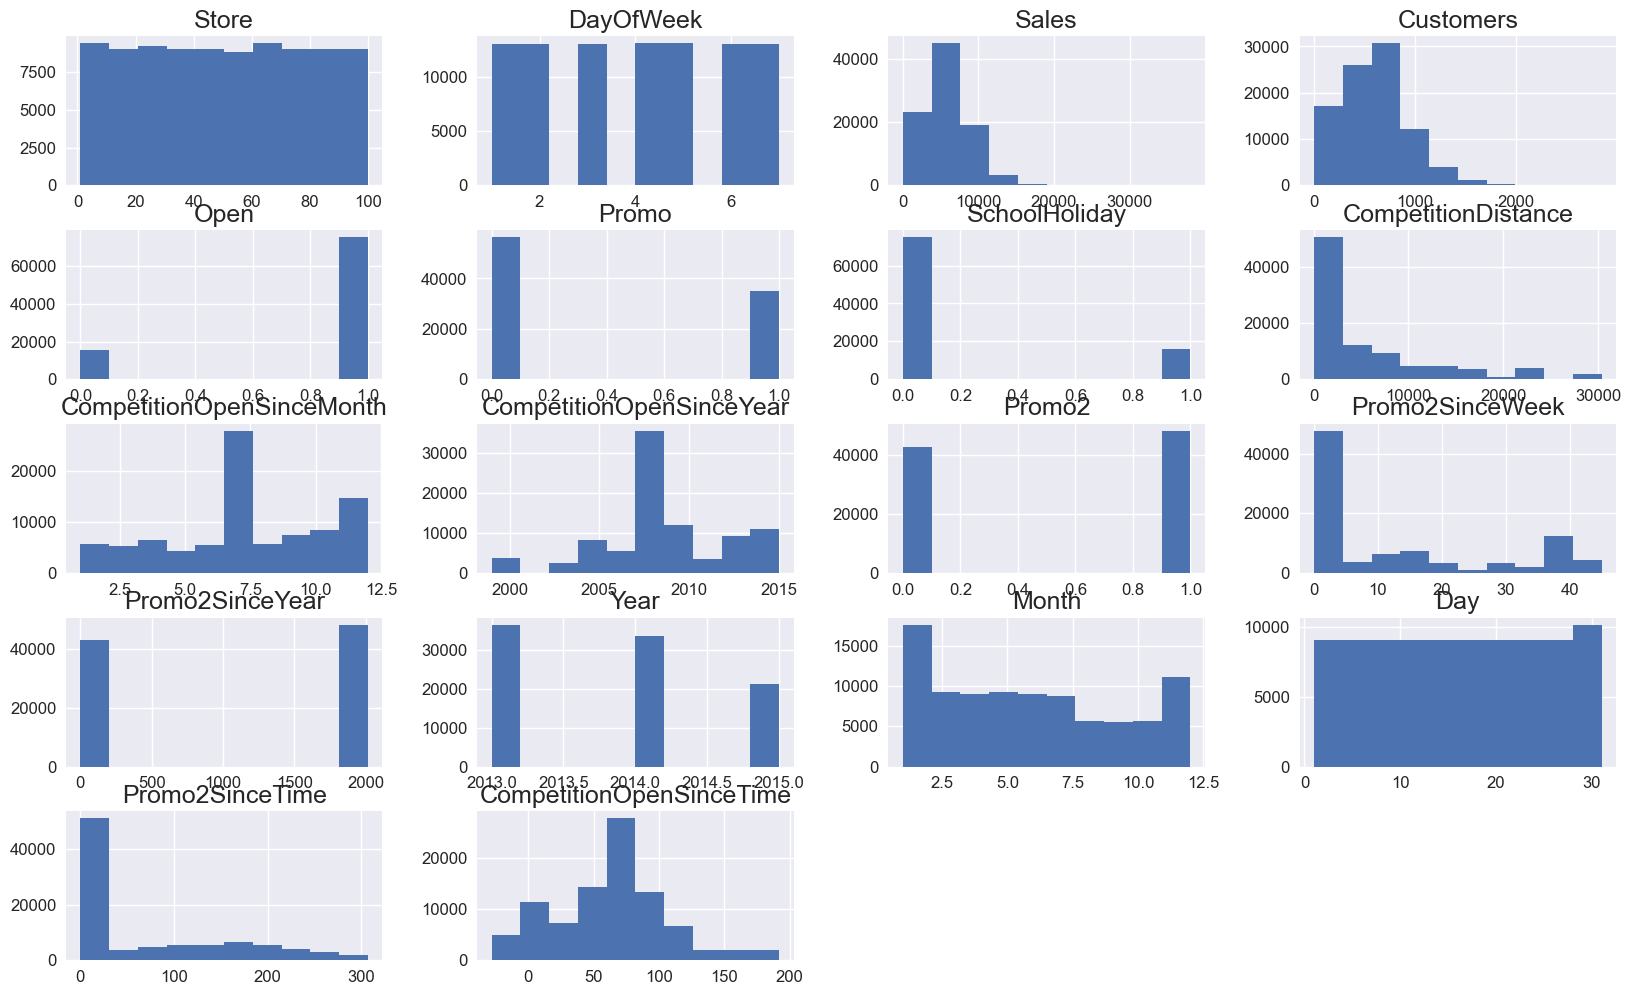

In [28]:
df_num.hist();

In [29]:
df_cat.apply(lambda x: x.unique())

StateHoliday                                          [0, a, b, c]
StoreType                                             [c, a, d, b]
Assortment                                                  [a, c]
PromoInterval    [0, Jan,Apr,Jul,Oct, Feb,May,Aug,Nov, Mar,Jun,...
dtype: object

*Open, SchoolHoliday & Promo2* are binary variables with 0 = no & 1 = yes.

*Assortment* only has 2 type a & c.

*PromoInterval* are intermittent period: one every 3 months.

In [30]:
print("Rossman stores earned nothing in {} days during the period, and there are {} days the stores had closed.".format(dfa[(dfa.Sales == 0)].count().mean(), dfa[(dfa.Open == 0)].count().mean()))

Rossman stores earned nothing in 15665.0 days during the period, and there are 15659.0 days the stores had closed.


The time stores didn't generate sales revenue was due to they didn't open that days, and the reason for closing are holidays or refurbishment, so it's no need to be analyzed and will be dropped out of the dataset.

In [31]:
# drop Sales = 0 & Open Column
dfa=dfa.drop(dfa[(dfa.Sales == 0)].index)
dfa=dfa.drop('Open', axis = 1)
dfa = dfa.reset_index(drop=True) # reset index

print("New dataset now has {} rows.".format(dfa.shape[0]))

New dataset now has 75591 rows.


### 3.1. Sales

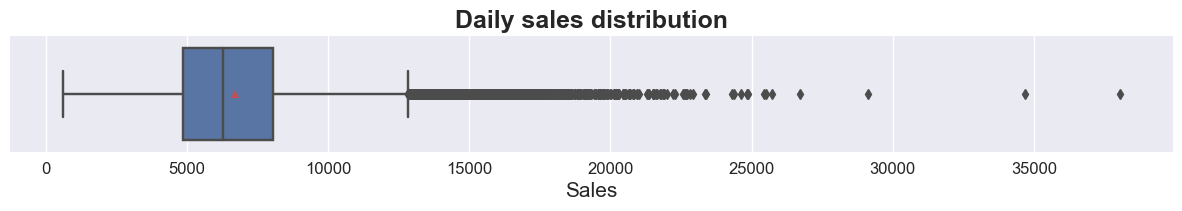

In [32]:
plt.figure(figsize=(15, 1.5))

sns.boxplot(x="Sales", data=dfa, showmeans= True) 
plt.title("Daily sales distribution", fontweight="bold")
plt.xlabel("Sales")
plt.show()

In [33]:
dfa["Sales"].describe()

count   75591.00000
mean     6694.54811
std      2609.60164
min       612.00000
25%      4865.00000
50%      6282.00000
75%      8058.00000
max     38037.00000
Name: Sales, dtype: float64

The sales distribution has many outliners, varing from 612 to 38037.

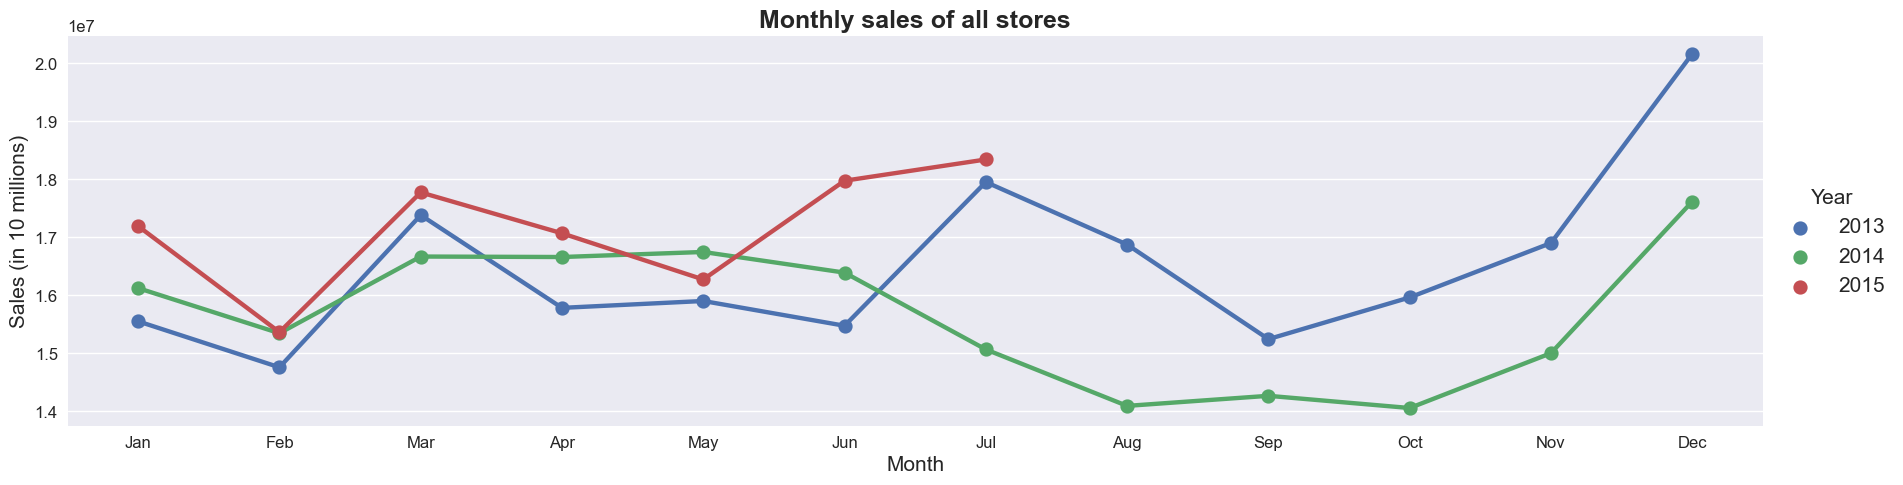

In [34]:
# label value!!
plt1 = df[["Year", "Month", "Sales"]].groupby(["Year", "Month"]).sum().reset_index()
# plt1pv = plt1.pivot(index="Month", columns="Year", values="Sales")
sns.catplot(x = 'Month', y = 'Sales', data=plt1[plt1["Year"]>0], hue = "Year",
           kind = 'point', errorbar = None, aspect=18/5)
plt.title("Monthly sales of all stores", fontweight="bold")
plt.xticks(range(0,12),("Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"))
plt.ylabel("Sales (in 10 millions)")
plt.show()

Overall, the total sales exhibited an upward trend, reaching their highest values in all months during 2015. However, the monthly sales in 2014 were inconsistent and often fell below the figures recorded of that in the last year.

Despite, over the course of the three-year period, there was no ditermined seasonal trend in sales. However, sales tend to ramain high in January and March in the first quater. Lastly, significant revenue can be expected during the final months of the year, especially December.

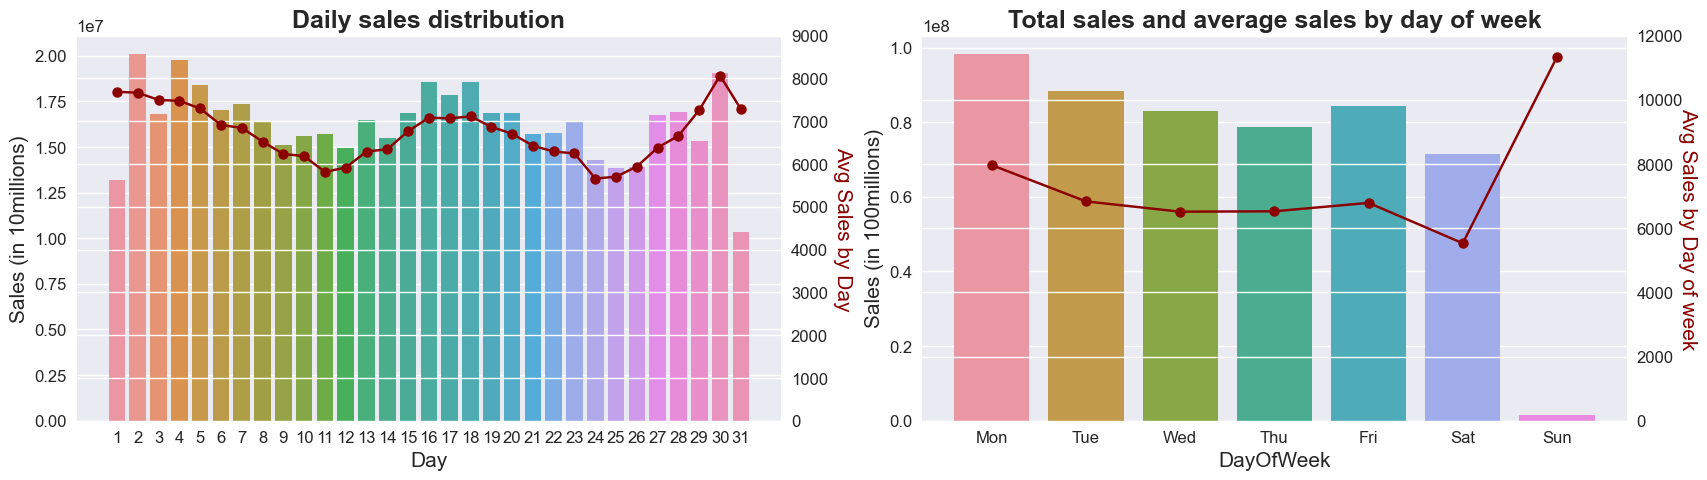

In [35]:
# Day of Week & Day of Month
fig, ax = plt.subplots(1, 2, figsize=(20, 5))

# chart 1
sns.barplot(x="Day", y="Sales",
            data=dfa[["Day", "Sales"]].groupby(["Day"]).sum().reset_index(), ax = ax[0])
ax[0].set_title("Daily sales distribution", fontweight="bold")
ax[0].set(ylabel ='Sales (in 10millions)')
ax2 = ax[0].twinx()
ax2.plot(dfa.groupby(by="Day")['Sales'].sum().reset_index().index, 
           (dfa.groupby(by="Day")['Sales'].sum()/dfa.groupby(by="Day")['Day'].count()),
           color = 'darkred', marker='.', ms = 15)
ax2.set_ylabel('Avg Sales by Day', color='darkred', rotation = -90)
ax2.yaxis.set_label_coords(1.1,.5)
ax2.set(ylim = (0,9000))

# chart 2
sns.barplot(x="DayOfWeek", y="Sales",
            data=dfa[["DayOfWeek", "Sales"]].groupby(["DayOfWeek"]).sum().reset_index(), ax = ax[1])
ax[1].set_title("Total sales and average sales by day of week", fontweight="bold")
ax[1].set(ylabel ='Sales (in 100millions)')
ax[1].set_xticks(range(0,7),("Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"))
ax21 = ax[1].twinx()
ax21.plot(dfa.groupby(by="DayOfWeek")['Sales'].sum().reset_index().index, 
           (dfa.groupby(by="DayOfWeek")['Sales'].sum()/dfa.groupby(by="DayOfWeek")["DayOfWeek"].count()),
           color = 'darkred', marker='.', ms = 15)
ax21.set_ylabel('Avg Sales by Day of week', color='darkred', rotation = 270)
ax21.yaxis.set_label_coords(1.1,.5)
ax21.set(ylim = (0,12000))

plt.show()

In terms of total sales and average sales, high sales figures were consistently observed at the beginning, middle, and end of each month.

While there was no apparent difference in sales between the days of the week, it was notable that Sundays, which were typically closed, recorded the biggest average sales figures despite not having special promotions or events.

In [36]:
# check whether Sundays have promo or special events or not
dfa[['StateHoliday', 'SchoolHoliday', 'Promo', 'Promo2']][(dfa.DayOfWeek == 7)].apply(lambda x: x.unique())

,StateHoliday,SchoolHoliday,Promo,Promo2
0,0,0,0,0


### 3.2. Sales vs Store type vs Customers

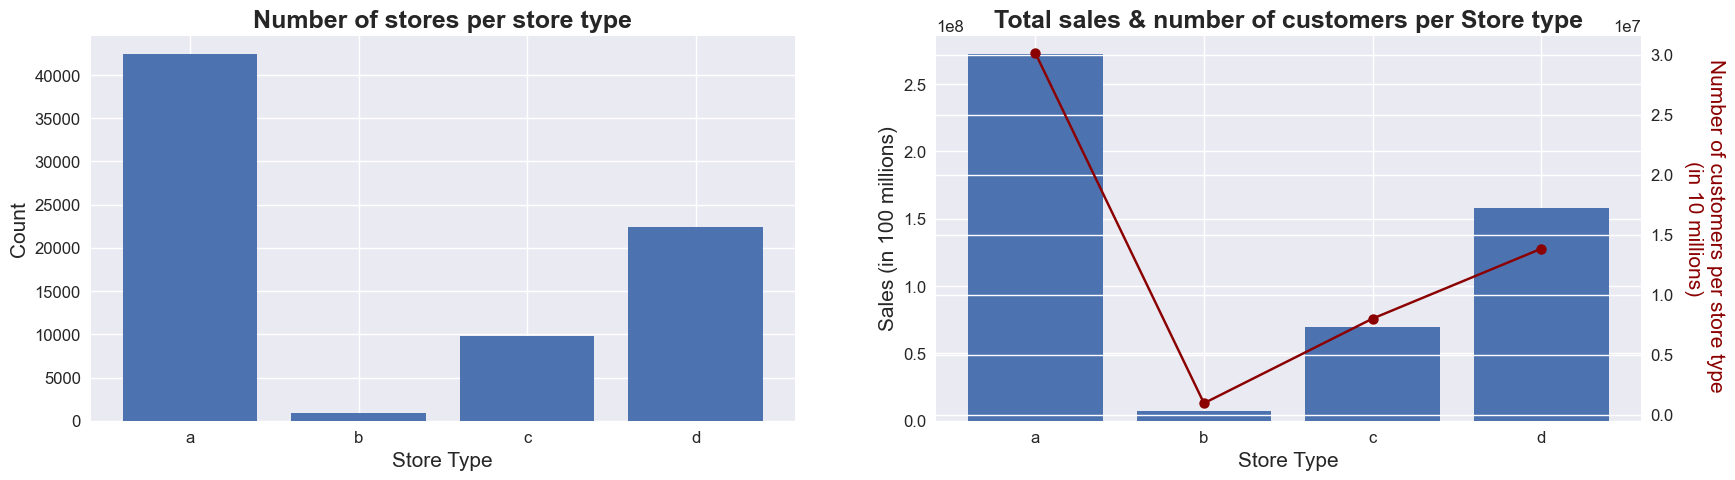

In [37]:
fig, ax = plt.subplots(1, 2, figsize=(20, 5))

# chart 1
ax[0].bar(dfa.groupby(by="StoreType").count().Store.index,
              dfa.groupby(by="StoreType").count().Store)
ax[0].set_title("Number of stores per store type", fontweight="bold")
ax[0].set(xlabel ='Store Type', ylabel ='Count')

# chart 2
ax[1].bar(dfa.groupby(by="StoreType").count().Store.index,
              dfa[["StoreType", "Store", "Sales"]].groupby(by="StoreType").sum().Sales)
ax[1].set_title("Total sales & number of customers per Store type", fontweight="bold")
ax[1].set(xlabel ='Store Type', ylabel ='Sales (in 100 millions)')
ax2 = ax[1].twinx()
ax2.plot(dfa.groupby(by="StoreType").count().Store.index, 
           dfa[["StoreType", "Store", "Customers"]].groupby(by="StoreType").sum().Customers,
           color = 'darkred', marker='.', ms = 15)
ax2.set_ylabel('Number of customers per store type \n(in 10 millions)', color='darkred', rotation = 270)
ax2.yaxis.set_label_coords(1.12,.5)

plt.show()

It can be seen that most of the Rossman stores are type *a*.
Number of stores are directly proportional to number of customer in all store type.

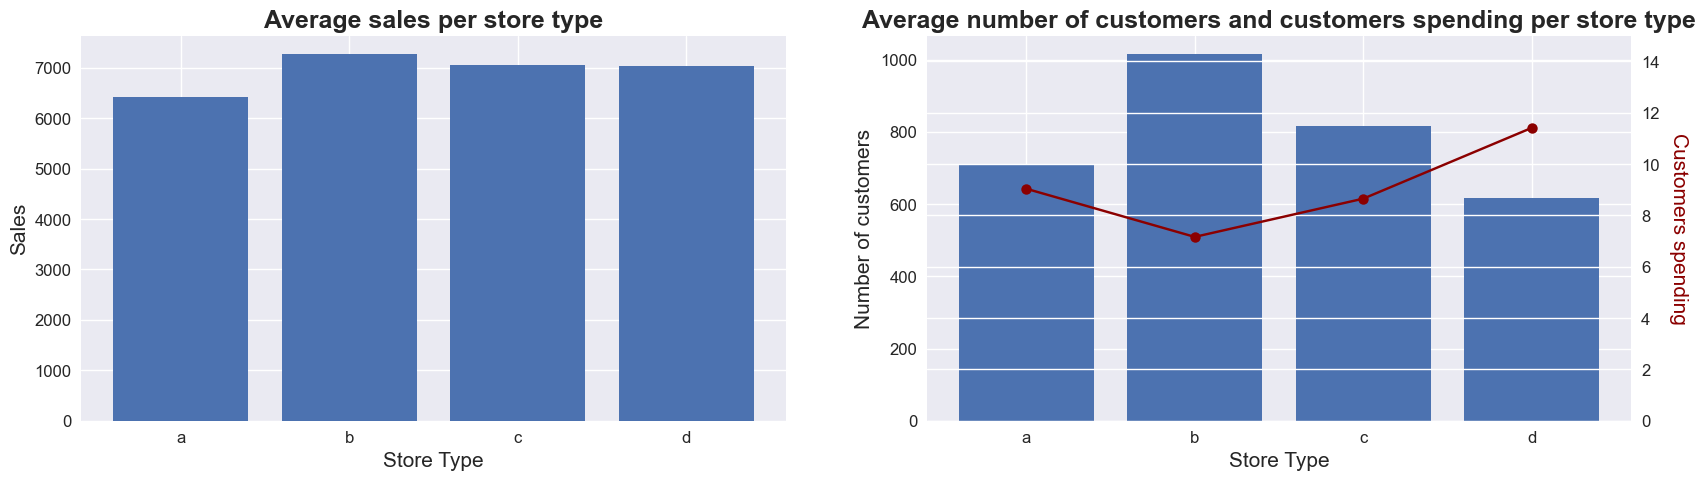

In [38]:
fig, ax = plt.subplots(1, 2, figsize=(20, 5))

# chart 1
ax[0].bar(dfa.groupby(by="StoreType").count().Store.index,
              dfa[["StoreType", "Store", "Sales"]].groupby(by="StoreType").mean().Sales)
ax[0].set_title("Average sales per store type", fontweight="bold")
ax[0].set(xlabel ='Store Type', ylabel ='Sales')
# chart 2
ax[1].bar(dfa.groupby(by="StoreType").count().Store.index,
              dfa[["StoreType", "Store", "Sales", "Customers"]].groupby(by="StoreType").mean().Customers)
ax2 = ax[1].twinx()
ax2.plot(dfa.groupby(by="StoreType").count().Store.index, 
           (dfa[["StoreType", "Store", "Sales", "Customers"]].groupby(by="StoreType")['Sales'].sum()/dfa[["StoreType", "Store", "Sales", "Customers"]].groupby(by="StoreType")['Customers'].sum()),
           color = 'darkred', marker='.', ms = 15)
ax[1].set_title("Average number of customers and customers spending per store type", fontweight="bold")
ax[1].set(xlabel ='Store Type', ylabel ='Number of customers')
ax2.set_ylabel('Customers spending', color='darkred', rotation = 270)
ax2.yaxis.set_label_coords(1.08,.5)
ax2.set(ylim = (0,15))

plt.show()

Averages sales in 4 types of stores were not much different, still, store type a had the smallest figures the rest of the store types. 
Store type b had the highest average customers but the lowest average spending, in contrast with store type d.

### 3.2. Sales vs Assortment vs Store Type 

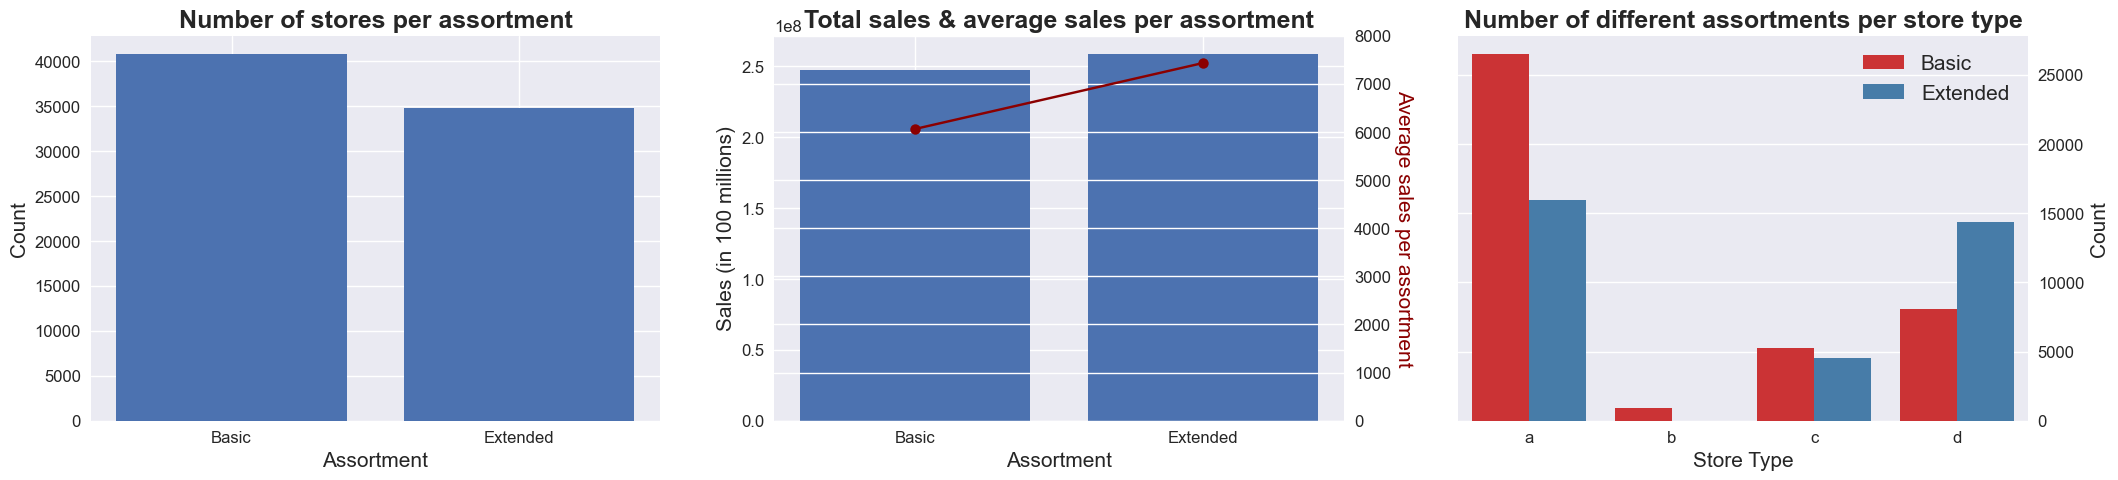

In [39]:
fig, ax = plt.subplots(1, 3, figsize=(25, 5))

# chart 1
ax[0].bar(dfa.groupby(by="Assortment").count().Store.index,
              dfa.groupby(by="Assortment").count().Store)
ax[0].set_title("Number of stores per assortment", fontweight="bold")
ax[0].set(xlabel ='Assortment', xticklabels = ['Basic','Extended'], ylabel ='Count')

# chart 2
ax[1].bar(dfa.groupby(by="Assortment").count().Store.index,
              dfa[["Store", "Sales", "Assortment"]].groupby(by="Assortment").sum().Sales)
ax[1].set_title("Total sales & average sales per assortment", fontweight="bold")
ax[1].set(xlabel ='Assortment', xticklabels = ['Basic','Extended'], ylabel ='Sales (in 100 millions)')
ax2 = ax[1].twinx()
ax2.plot(dfa.groupby(by="Assortment").count().Store.index,
         dfa[["Store", "Sales", "Assortment"]].groupby(by="Assortment").mean().Sales,
         color = 'darkred', marker='.', ms = 15)
ax2.set_ylabel('Average sales per assortment', color='darkred', rotation = 270)
ax2.yaxis.set_label_coords(1.12,.5)
ax2.set(ylim = (0,8000))

# chart 3
sns.countplot(x="StoreType",hue="Assortment", data=dfa, ax = ax[2], 
              palette=sns.color_palette("Set1", n_colors=2),
              order=["a","b","c","d"])
ax[2].set_title("Number of different assortments per store type", fontweight="bold")
ax[2].set(xlabel ='Store Type', ylabel ='Count')
ax[2].yaxis.tick_right()
ax[2].yaxis.set_label_position("right")
ax[2].legend(labels = ['Basic','Extended'])
plt.show()

Despite being fewer in number, the extended assortment stores accounted for higher figures in both total and average sales. This helps to explain why store type *a*, which primarily used basic assortments, did not generate as much revenue on average compared to other store types, especially store type *d*, greater included extended assortments.

### 3.3. Sales vs Promotion

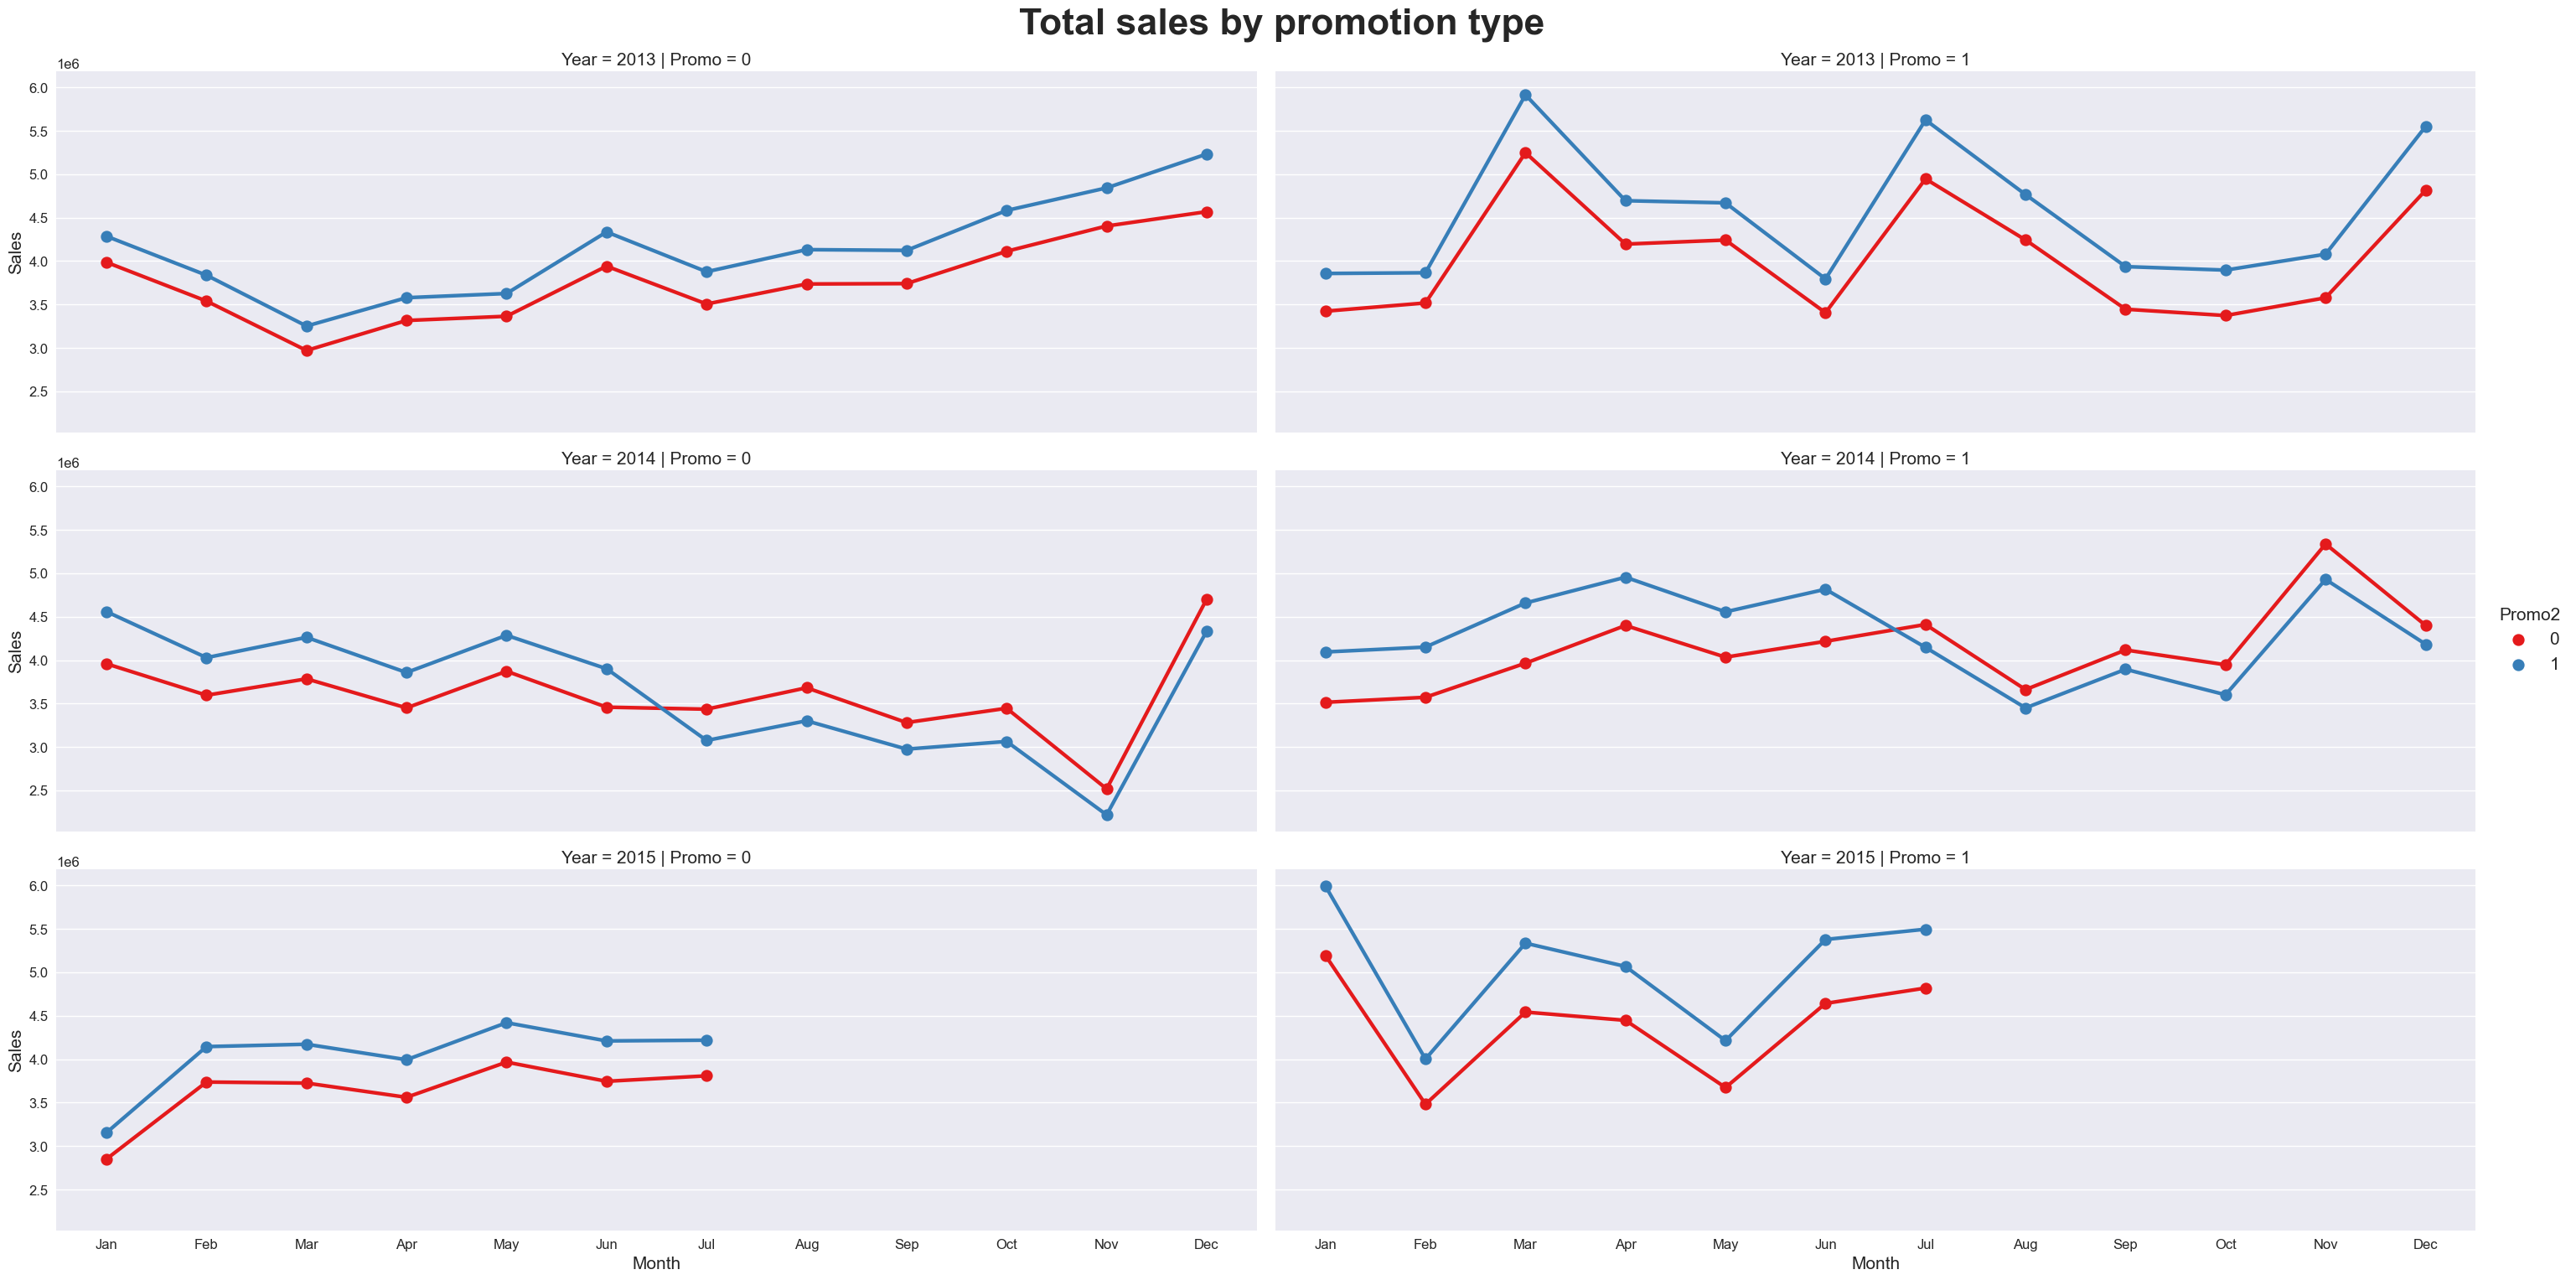

In [40]:
plt2 = dfa[["Year", "Month", "Sales", "Promo", "Promo2"]].groupby(["Year", "Month", "Promo", "Promo2"]).sum().reset_index()

# plt.title("Total sales by promotion type", fontweight="bold")
sns.catplot(data = plt2[plt2["Year"] != 0], x ="Month", y = "Sales",
            col = 'Promo', hue = 'Promo2', row = "Year",
            kind="point", errorbar = None,
            palette=sns.color_palette("Set1", n_colors=4),
            aspect = 12/4).fig.suptitle("Total sales by promotion type", fontweight="bold", fontsize =32, y = 1.02)
plt.xticks(range(0,12),("Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"))

plt.show()

In general, stores that run individual promotions tend to have higher sales figures. Furthermore, co-operative promotional campaigns between stores (Promo2) also lead to increased sales, except for the last six months of 2014.

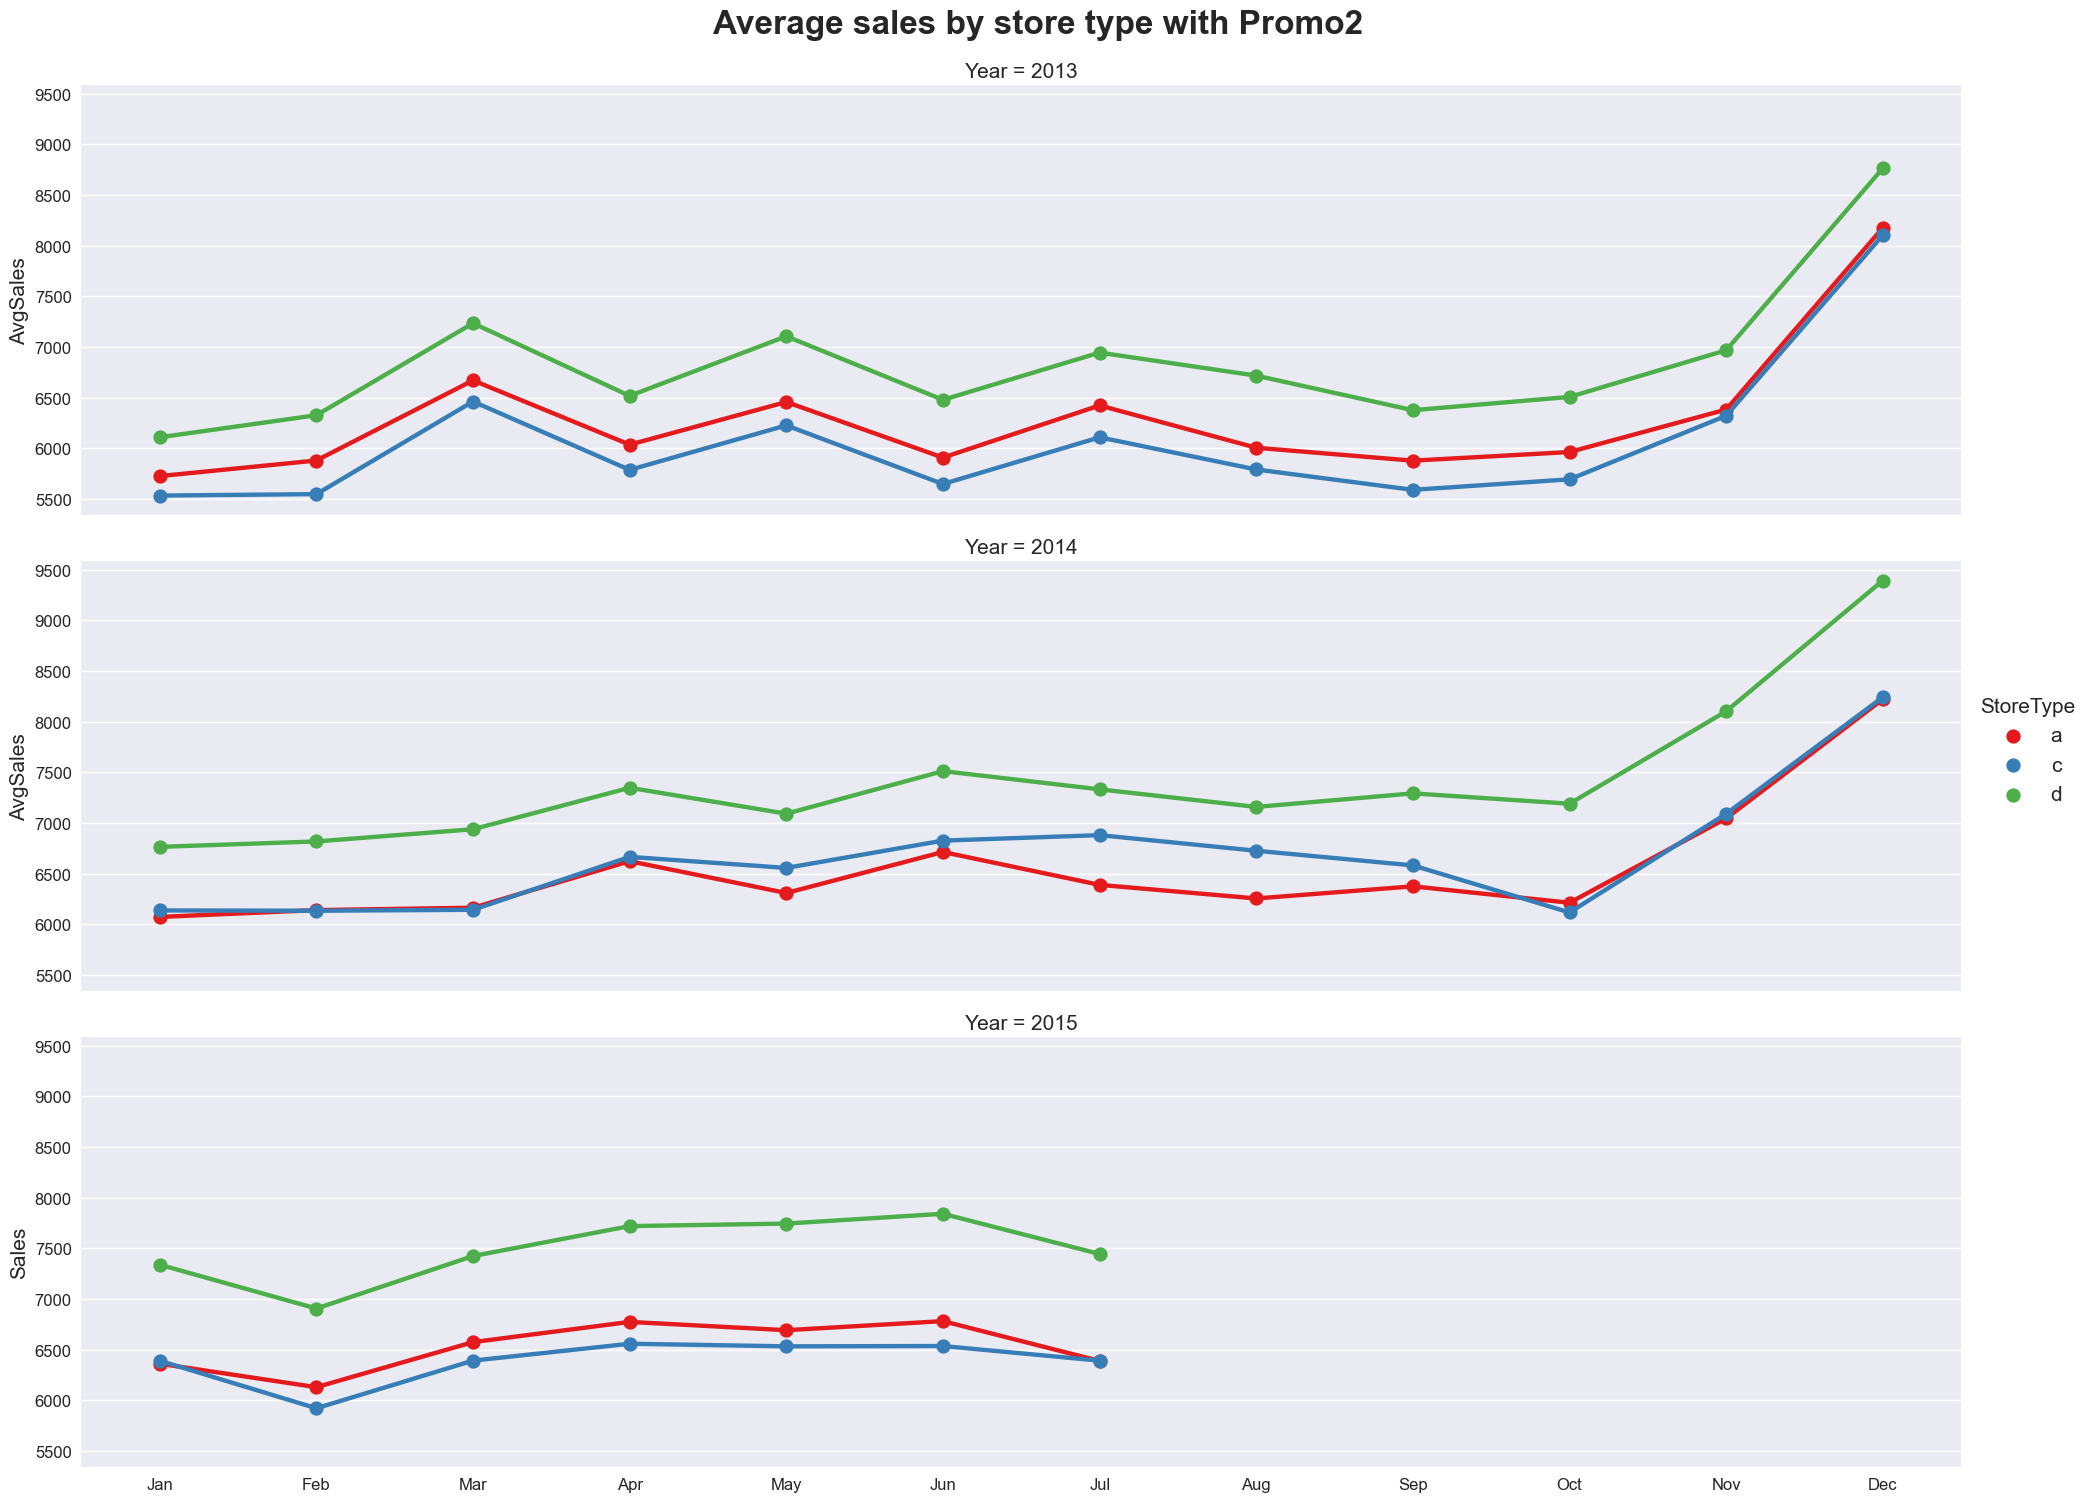

In [41]:
plt3 = dfa[dfa["Promo2"] == 1][["Year", "Month", "Sales", "StoreType", "Promo2"]].groupby(["Year", "Month", "StoreType"]).sum().reset_index()
plt3["AvgSales"] = plt3["Sales"]/plt3["Promo2"]
sns.catplot(data = plt3, x ="Month", y = "AvgSales",
            hue = 'StoreType', row = "Year",
            kind="point", errorbar = None,
            palette=sns.color_palette("Set1", n_colors=4), 
            aspect = 12/3).fig.suptitle("Average sales by store type with Promo2", fontweight="bold", fontsize =24, y = 1.02)
plt.xticks(range(0,12),("Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"))
# plt.title("Average sales by store type with Promo2", fontweight="bold")
plt.xlabel("")
plt.ylabel("Sales")
plt.show()

Co-operative promotional campaigns (Promo2) had a similar pattern across all store types, except for store type *b*, which did not participate. However, despite the standard impact across most store types, store type *a* experienced significantly higher sales.

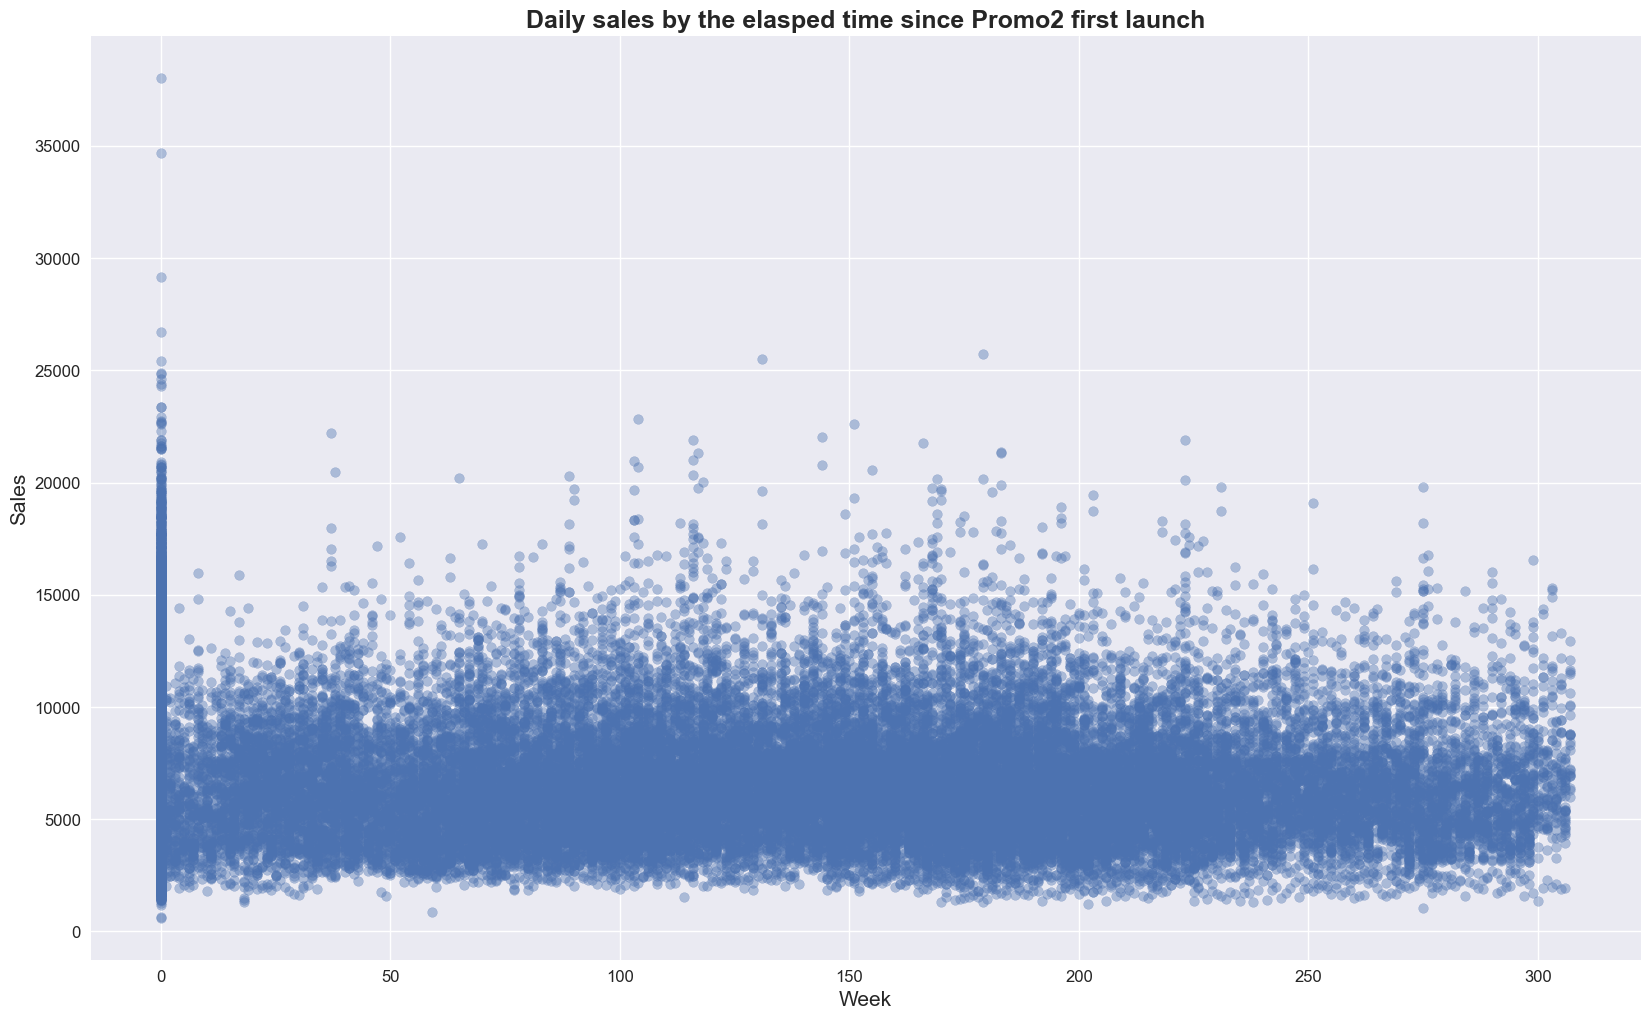

In [42]:
plt.scatter(dfa.Promo2SinceTime, dfa.Sales, alpha=0.4)
plt.title("Daily sales by the elasped time since Promo2 first launch", fontweight="bold")
plt.xlabel("Week")
plt.ylabel("Sales")
plt.show()

No significant correlation exists between the passage of time since the initial launch of Promo2 and the daily sales figures.

### 3.4. Sales vs Holiday

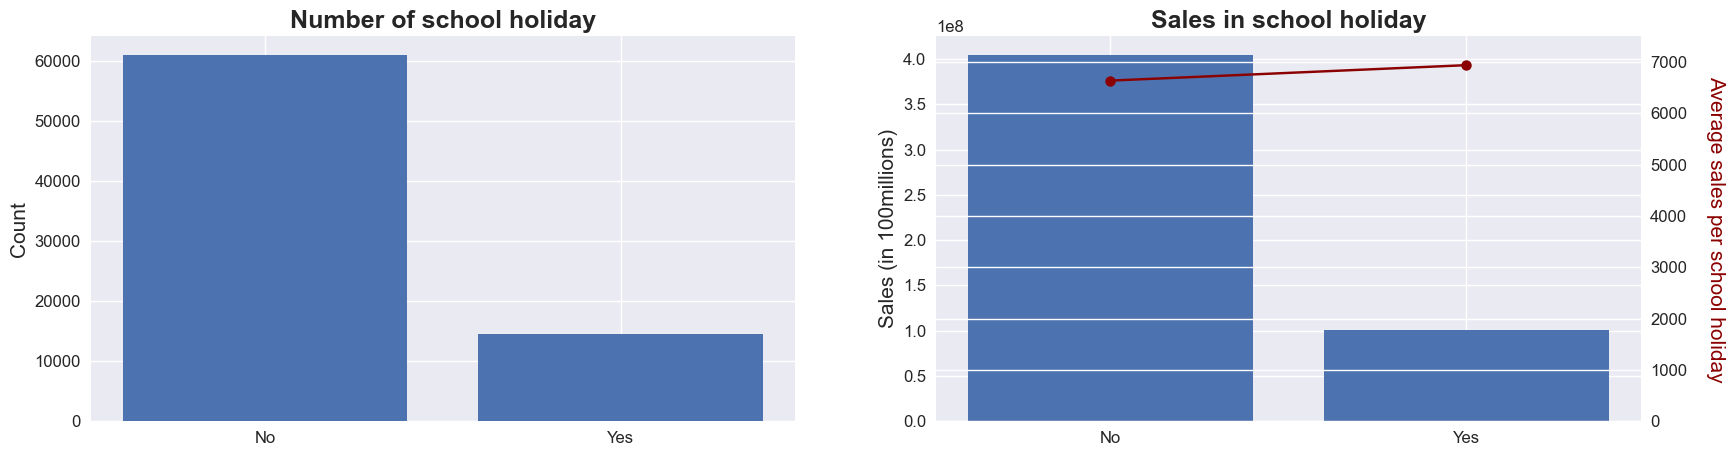

In [43]:
fig, ax = plt.subplots(1, 2, figsize=(20, 5))

# chart 1
ax[0].bar(dfa.groupby(by="SchoolHoliday").count().Date.index,
              dfa.groupby(by="SchoolHoliday").count().Date)
ax[0].set_title("Number of school holiday", fontweight="bold")
ax[0].set(xlabel ='', ylabel ='Count')
ax[0].set_xticks(range(0,2),("No", "Yes"))

# chart 2
ax[1].bar(dfa.groupby(by="SchoolHoliday").count().Date.index,
              dfa[["SchoolHoliday", "Sales"]].groupby(by="SchoolHoliday").sum().Sales)
ax[1].set_title("Sales in school holiday", fontweight="bold")
ax[1].set(xlabel ='', ylabel = 'Sales (in 100millions)')#, xticklabels = ['0','1'], ylabel ='Count')
ax[1].set_xticks(range(0,2),("No", "Yes"))
ax2 = ax[1].twinx()
ax2.plot(dfa.groupby(by="SchoolHoliday").count().Date.index,
         dfa[["SchoolHoliday", "Sales"]].groupby(by="SchoolHoliday").mean().Sales,
         color = 'darkred', marker='.', ms = 15)
ax2.set_ylabel('Average sales per school holiday', color='darkred', rotation = 270)
ax2.yaxis.set_label_coords(1.12,.5)
ax2.set(ylim = (0,7500))
plt.show()

According to the graphs, the closure of public schools did not have a significant impact on the sales figures.

### 3.5. Sales vs Competition

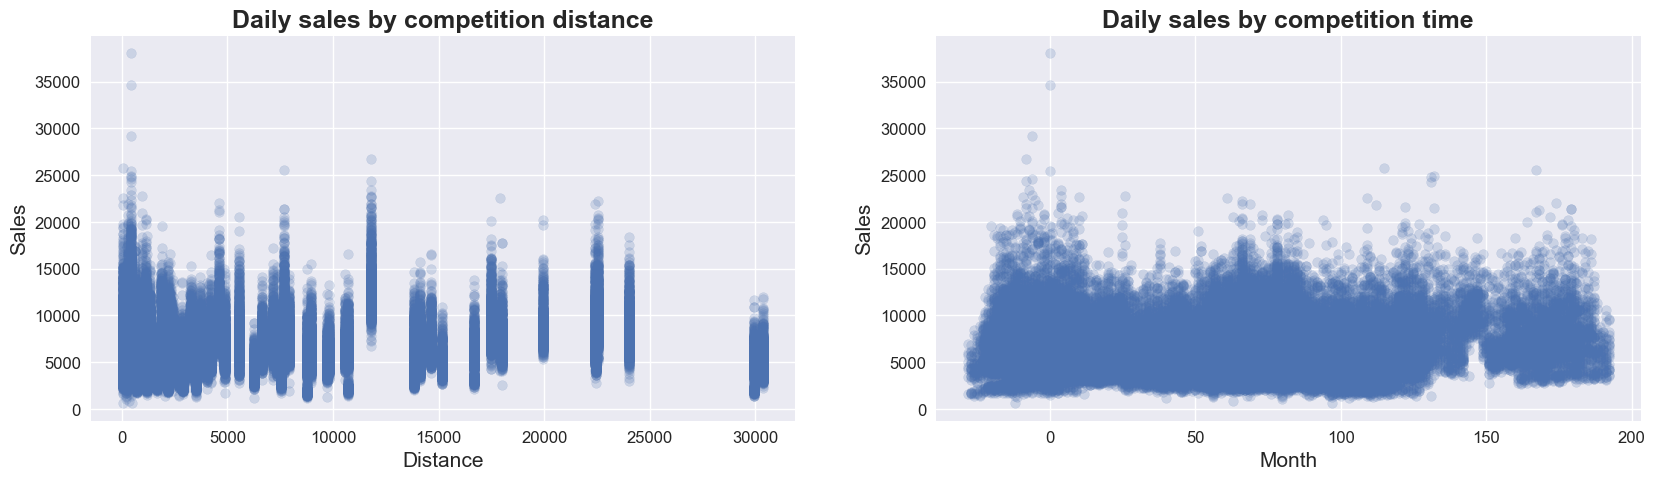

In [44]:
fig, ax = plt.subplots(1, 2, figsize=(20, 5))

ax[0].scatter(dfa.CompetitionDistance, dfa.Sales, alpha=0.2)
ax[0].set_title("Daily sales by competition distance", fontweight="bold")
ax[0].set(xlabel ='Distance', ylabel ='Sales')
ax[1].scatter(dfa.CompetitionOpenSinceTime, dfa.Sales, alpha=0.2)
ax[1].set_title("Daily sales by competition time", fontweight="bold")
ax[1].set(xlabel ='Month', ylabel ='Sales')       
plt.show()

There is also no significant correlation between the distance or their length of existence of the nearest competitor and the daily sales figures.

### 3.6. Correlation matrix

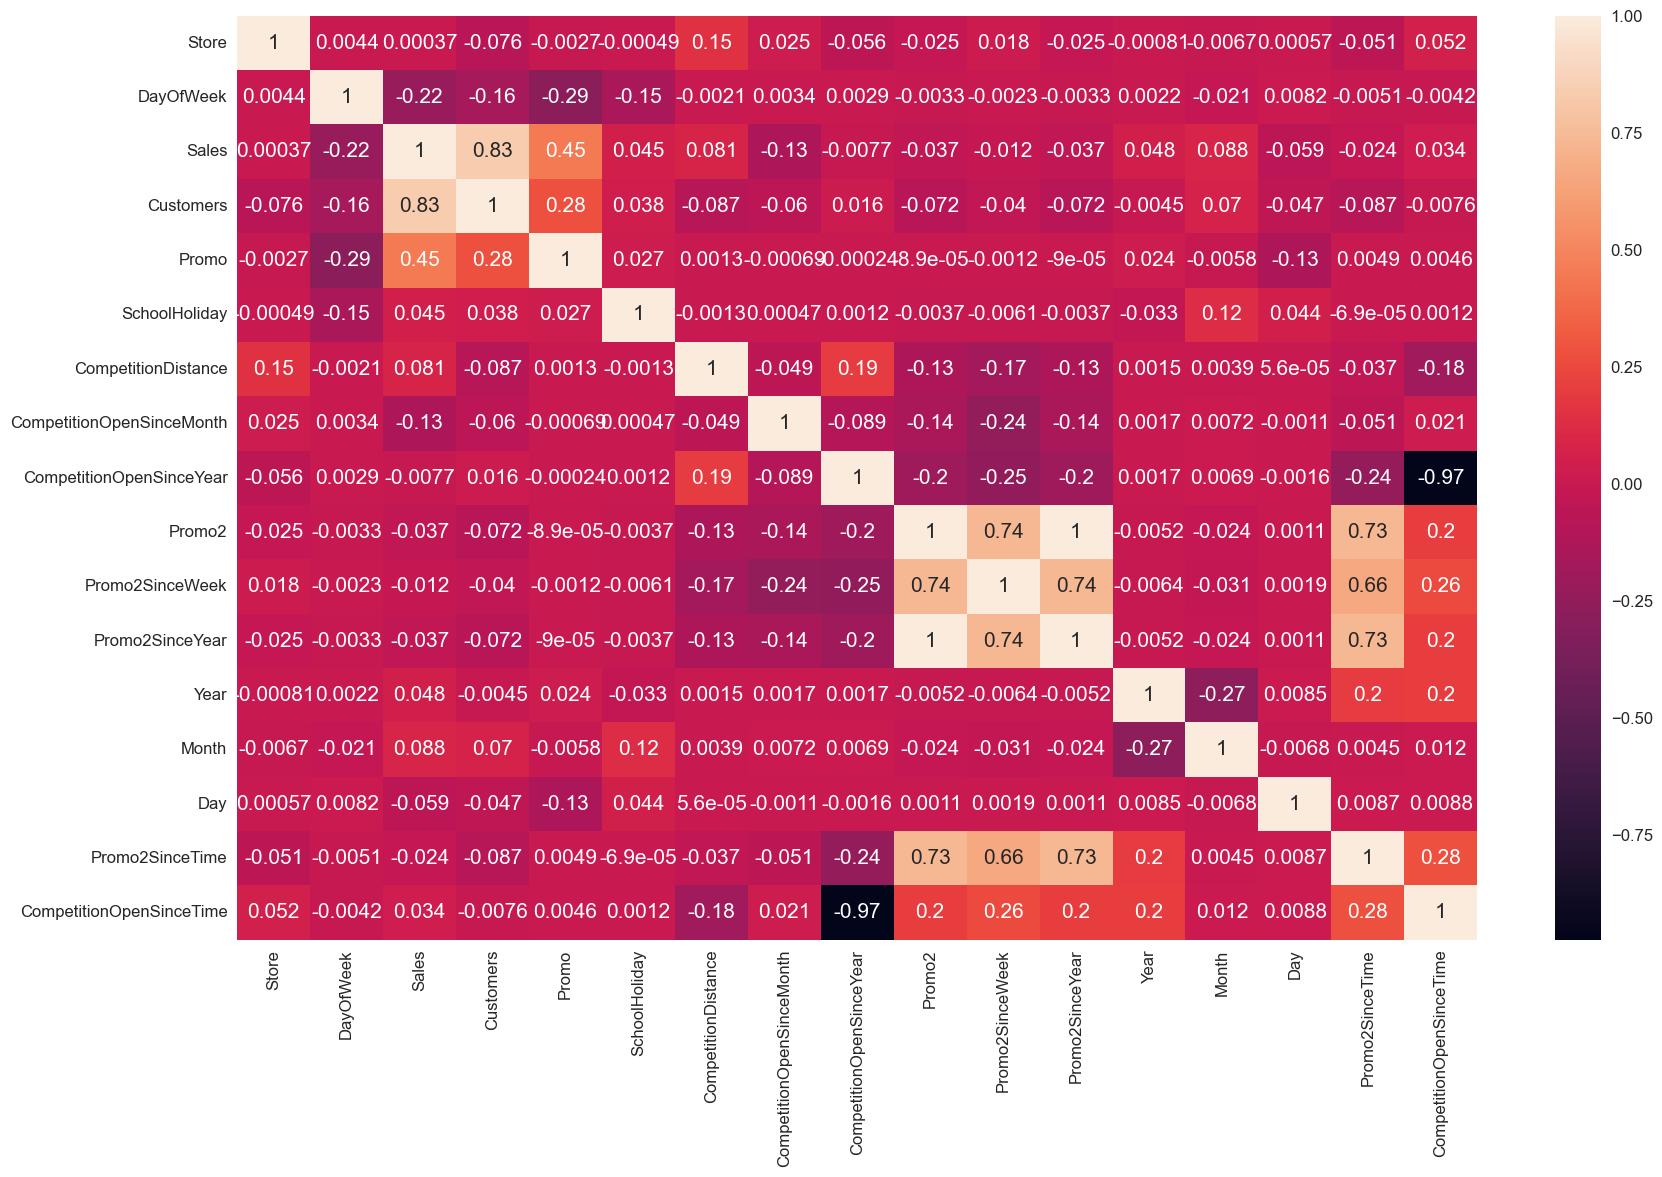

In [45]:
correlation = dfa.select_dtypes(exclude=["object", "datetime64[ns]"]).corr()
sns.heatmap(correlation, annot=True);

**Findings**
- Sales figures showed an upward trends after three year.
- Customers tend to shop at the beginning, middle, and end of each month.
- Sundays have the potential to generate more sales than weekdays.
- Store *d* had the highest spending per customer compared to other stores.
- Stores with extended assortments generally have higher sales figures than basic stores.
- Running promotional campaigns increases revenue, with higher revenue generated when running both Promo and Promo2.
- Among all store types, Promo2 had the most significant impact on Store D.

## 4. Sales prediction with Linear Regression model

The linear regression model has the form below, with X is the input value of all variables and predicting a output Y. beta0 is the intercept and beta-j is the slope coefficient.

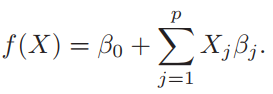

In [65]:
from IPython.display import Image
Image("LR.png")

The method of the model is *least squares*, which minimizes the residual sum of squares:

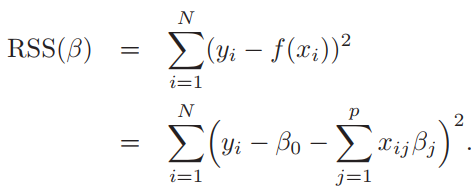

In [67]:
Image("LR2.png")

The unique solution for that equation is given by:

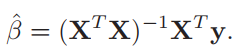

In [68]:
Image("LR3.png")

### 4.1. Data encoding

In [46]:
dfp = dfa.copy()

In [47]:
# categorical variables encoding

dfp = pd.get_dummies(dfp, prefix=["StoreType"], columns=["StoreType"]) # one hot encoding

dfp = pd.get_dummies(dfp, prefix=["StateHoliday"], columns=["StateHoliday"], drop_first=True) # dummy encoding

# ordinal Enconding
dfp["Assortment"].loc[dfp["Assortment"] == 'a'] = 1
dfp["Assortment"].loc[dfp["Assortment"] == 'c'] = 2

In [48]:
# time encoding
# day of week
dfp['DayOfWeekSin'] = dfp['DayOfWeek'].apply(lambda x: np.sin( x * (2. * np.pi/7)))
dfp['DayOfWeekCos'] = dfp['DayOfWeek'].apply(lambda x: np.cos( x * (2. * np.pi/7)))

# month
dfp['MonthSin'] = dfp['Month'].apply(lambda x: np.sin(x * (2. * np.pi/12)))
dfp['MonthCos'] = dfp['Month'].apply(lambda x: np.cos(x * (2. * np.pi/12)))

# day 
dfp['DaySin'] = dfp['Day'].apply(lambda x: np.sin(x * (2. * np.pi/30)))
dfp['DayCos'] = dfp['Day'].apply(lambda x: np.cos(x * (2. * np.pi/30)))

In [49]:
dfp = dfp.drop(['DayOfWeek', 'Day', 'Month', 'Customers', 'Date', 'PromoInterval'], axis=1 )

In [50]:
dfp.sample(5)

,Store,Sales,Promo,SchoolHoliday,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,...,StoreType_d,StateHoliday_a,StateHoliday_b,StateHoliday_c,DayOfWeekSin,DayOfWeekCos,MonthSin,MonthCos,DaySin,DayCos
53826,82,6979,0,0,1,22390,4,2008,1,37,...,False,False,False,False,-0.43388,-0.90097,-1.00000,-0.00000,-0.74314,-0.66913
72861,76,7694,0,0,2,19960,3,2006,0,0,...,True,False,False,False,-0.78183,0.62349,0.86603,0.50000,0.40674,0.91355
45154,48,3825,0,1,1,1060,5,2012,0,0,...,False,False,False,False,-0.97493,-0.22252,0.50000,0.86603,0.58779,0.80902
44047,11,6491,0,0,2,960,11,2011,1,1,...,False,False,False,False,-0.43388,-0.90097,0.50000,0.86603,-0.20791,-0.97815
65650,75,7700,1,0,2,22440,12,2013,0,0,...,True,False,False,False,0.97493,-0.22252,0.86603,-0.50000,-0.00000,1.00000


### 4.2. Feature scaling

In [51]:
# for Independent Variables
# normalization
max1 = dfp['CompetitionDistance'].max()
min1 = dfp['CompetitionDistance'].min()
dfp['CompetitionDistance'] = dfp['CompetitionDistance'].apply(lambda x: (x-min1)/(max1-min1))
# standardization
mean1 = dfp['CompetitionOpenSinceTime'].mean()
std1 = dfp['CompetitionOpenSinceTime'].std()
dfp['CompetitionOpenSinceTime'] = dfp['CompetitionOpenSinceTime'].apply(lambda x: (x-mean1)/std1)
mean2 = dfp['Promo2SinceTime'].mean()
std2 = dfp['Promo2SinceTime'].std()
dfp['Promo2SinceTime'] = dfp['Promo2SinceTime'].apply(lambda x: (x-mean2)/std2)

In [52]:
# for Dependent Variables
dfp["Sales"] = np.log1p(dfp["Sales"])

### 4.3. Data modeling

In [53]:
# drop Sales column
dfp1 = dfp.drop(['Sales'], axis = 1)

In [54]:
# train set & test set
x_train, x_test, y_train, y_test = train_test_split(dfp1.values,
                                                    dfp['Sales'].values,
                                                    test_size = 0.3, random_state=1)
x_train = x_train.astype(np.float32)
y_train = y_train.astype(np.float32)

In [55]:
# calculate errors
def model_error(time, y, yhat):
    
    # mean absolute error
    mae = np.mean(abs(y - yhat))
    # mean absolute percentage error
    mape = np.mean(np.abs((y - yhat) / y))
    # root mean square error
    rmse = np.sqrt(np.mean((y - yhat)**2))
  
    return pd.DataFrame({"MAE": mae,
                         "MAPE": mape,
                         "RMSE": rmse}, index=[time])

In [56]:
# calculate Z score for feature selection
def model_sta(df, coef, x, y, yhat):
    
    xbar = np.concatenate((np.ones((x.shape[0], 1)), x), axis = 1)
    n = len(y) # obs
    k = len(df.columns)
    
    # term
    term = df.columns.to_list()
    term.insert(0, 'Intercept')
    
    # variance σ2
    var = np.sum((y - yhat)**2)/(n-k-1)
    
    # standard errors
    sd = np.sqrt(var*(np.linalg.pinv(np.dot(xbar.T,xbar).astype('float64')).diagonal()))
    
    # Z score
    z = coef/sd
    
    return(pd.DataFrame({"Independant Variables": term, "Coefficients": coef,
                        "Standard Errors": sd, "Z score": z}))

In [57]:
# Linear Regression model
def linear_rgr_train(xtrain, ytrain):
    
    # add 1 in the first position of each row of x_train vector
    one = np.ones((xtrain.shape[0], 1))
    Xbar = np.concatenate((one, xtrain), axis = 1)
    
    # calculate solution of least squares estimates & residual
    coef = np.dot(np.linalg.pinv(np.dot(Xbar.T, Xbar)), np.dot(Xbar.T, ytrain))
    
    return coef
    
def linear_rgr_test(coef, xtest):
    
    # add 1 in the first position of each row of x_test vector
    Xtestbar = np.concatenate((np.ones((xtest.shape[0], 1)), xtest), axis = 1)
    
    # apply model to test set
    rgr_result = np.dot(coef, Xtestbar.T)
 
    return rgr_result

In [58]:
# 
coef1 = linear_rgr_train(x_train, y_train)
y_pred1 = linear_rgr_test(coef1, x_test).astype(np.float32)

In [59]:

model_error("1st", np.expm1(y_test), np.expm1(y_pred1))

,MAE,MAPE,RMSE
1st,1563.96982,0.24979,2105.26150


Linear Regression model has MAE = 1563.96982, MAPE = 0.24979, RMSE = 2105.26150

#### Variable subset selection

In [60]:
model_sta(dfp1, coef1, x_test, y_test, y_pred1)

,Independant Variables,Coefficients,Standard Errors,Z score
0,Intercept,-4.07128,5.99727,-0.67886
1,Store,-0.00029,0.00007,-4.01586
2,Promo,0.36680,0.00430,85.28958
3,SchoolHoliday,0.04939,0.00537,9.20056
4,Assortment,0.21339,0.00446,47.86323
5,CompetitionDistance,0.07414,0.00977,7.58680
6,CompetitionOpenSinceMonth,0.00885,0.00128,6.93133
7,CompetitionOpenSinceYear,0.30784,0.01208,25.47929
8,Promo2,-98.24918,10.45119,-9.40077
9,Promo2SinceWeek,0.00312,0.00024,13.17354


Based on the Z-score analysis, the linear model includes several variables with insignificant values (Z < 2 for significance at the 5% level, or p < 0.05), such as *Store (ID), Promo2, Year, StoreType, StateHoliday* except for *Easter*. These terms can be deleted for constructing a simpler model, particularly if there are many missing values or the cost of collecting the data is high. This can be done without significantly reducing the overall accuracy of the model. 

Below is the example of subset selection:

In [61]:
# 2nd time running
dfp2 = dfp1.drop(['Store', 'Promo2', 'Year',
                  'StoreType_a', 'StoreType_b', 'StoreType_c','StoreType_d',
                  'StateHoliday_a', 'StateHoliday_c', 'MonthCos'], axis = 1)
x_train2 = np.delete(x_train, [0, 7, 10, 13, 14, 15, 16, 17, 19, 23], 1).astype(np.float32)
x_test2 = np.delete(x_test, [0, 7, 10, 13, 14, 15, 16, 17, 19, 23], 1).astype(np.float32)

coef2 = linear_rgr_train(x_train2, y_train)
y_pred2 = linear_rgr_test(coef2, x_test2).astype(np.float32)

model_sta(dfp2, coef2, x_test2, y_test, y_pred2)

,Independant Variables,Coefficients,Standard Errors,Z score
0,Intercept,-62.29659,5.97785,-10.42123
1,Promo,0.36480,0.00440,82.92216
2,SchoolHoliday,0.04046,0.00545,7.42579
3,Assortment,0.22339,0.00442,50.52171
4,CompetitionDistance,0.04160,0.00945,4.40080
5,CompetitionOpenSinceMonth,-0.01220,0.00083,-14.66189
6,CompetitionOpenSinceYear,0.03518,0.00297,11.82618
7,Promo2SinceWeek,0.00252,0.00022,11.67664
8,Promo2SinceYear,-0.00006,0.00000,-16.49922
9,Promo2SinceTime,0.00108,0.00345,0.31420


For the second running, model still has 3 insignificant variables, which are *CompetitionOpenSinceMonth, Promo2SinceYear, Promo2SinceTime*.

In [62]:
# 3rd time running
dfp3 = dfp2.drop(['CompetitionOpenSinceMonth', 'Promo2SinceYear', 'Promo2SinceTime'], axis = 1)
x_train3 = np.delete(x_train2, [4, 7, 8], 1).astype(np.float32)
x_test3 = np.delete(x_test2, [4, 7, 8], 1).astype(np.float32)

coef3 = linear_rgr_train(x_train3, y_train)
y_pred3 = linear_rgr_test(coef3, x_test3).astype(np.float32)
model_sta(dfp3, coef3, x_test3, y_test, y_pred3)

,Independant Variables,Coefficients,Standard Errors,Z score
0,Intercept,-92.38733,5.45710,-16.92974
1,Promo,0.36472,0.00446,81.85092
2,SchoolHoliday,0.04011,0.00552,7.26894
3,Assortment,0.20998,0.00430,48.84645
4,CompetitionDistance,0.05593,0.00941,5.94147
5,CompetitionOpenSinceYear,0.05011,0.00272,18.44128
6,Promo2SinceWeek,0.00030,0.00014,2.14703
7,CompetitionOpenSinceTime,0.17691,0.00934,18.94948
8,StateHoliday_b,0.72785,0.22388,3.25108
9,DayOfWeekSin,0.03324,0.00283,11.75746


Comparing 3 time errors:

In [63]:
pd.concat([model_error("1st", np.expm1(y_test), np.expm1(y_pred1)),
         model_error("2nd", np.expm1(y_test), np.expm1(y_pred2)),
         model_error("3rd", np.expm1(y_test), np.expm1(y_pred3))], axis=0)

,MAE,MAPE,RMSE
1st,1563.96982,0.24979,2105.26150
2nd,1588.17640,0.25443,2153.90338
3rd,1606.64569,0.25788,2179.52951
